# **Sebastian Ramos and Tomas Vera Audio Feature Extraction Project**


In this project, we wrote a Python program that analyzes the features of audio recordings from different musical genres: rock, classical, jazz, and speech.


Part 1

For 2 examples from each genre, we computed and plotted the audio signal waveform as well as the magnitude spectrum of the audio signal.


Part 2 

Next, we analyzed the signals to obtain summary statistics that highlight differences between the music genres using block-based analysis. We used block based analysis to extract short-time (local) features, and compute a summary statistic of each feature (mean, standard deviation)


Project datafiles provided by Yon Visell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import essentia.standard as es
import IPython as ipy

# **Part 1**
Plot audio signal waveform as well as the magnitude spectrum of the audio signal


-----classical file 1-----
./music_dataFolder/classical/classical1.wav


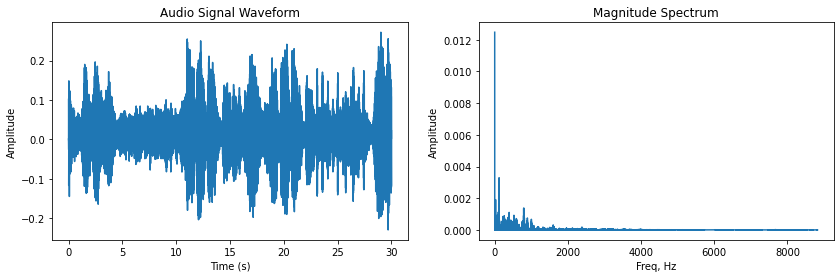


-----classical file 2-----
./music_dataFolder/classical/classical2.wav


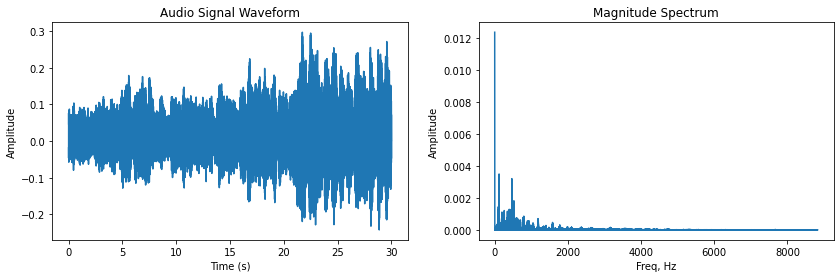


-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav


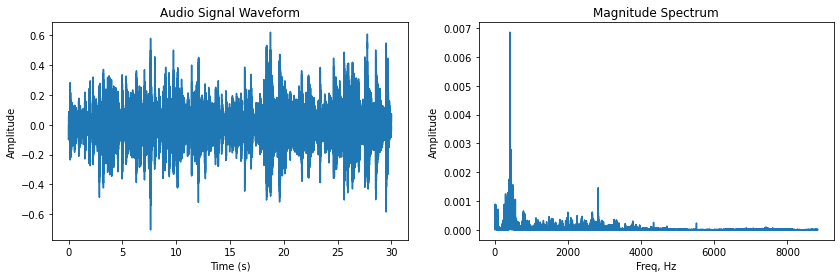


-----jazz file 2-----
./music_dataFolder/jazz/duke.wav


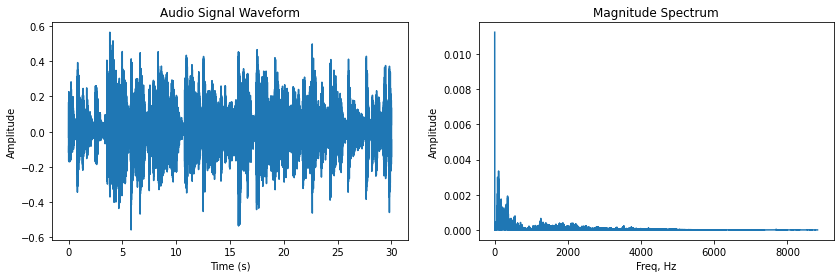


-----rockblues file 1-----
./music_dataFolder/rockblues/rock2.wav


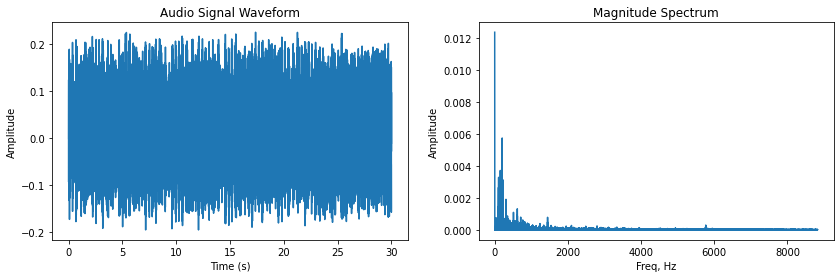


-----rockblues file 2-----
./music_dataFolder/rockblues/hendrix.wav


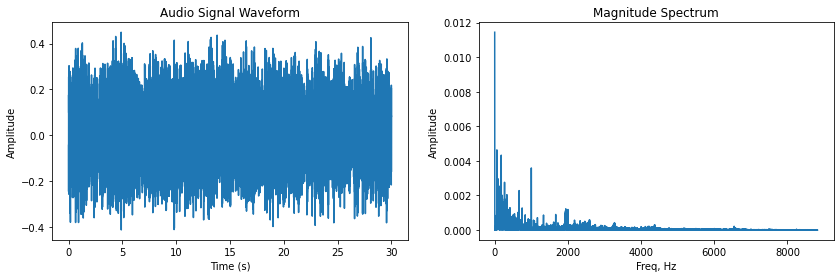


-----speech file 1-----
./music_dataFolder/speech/teachers1.wav


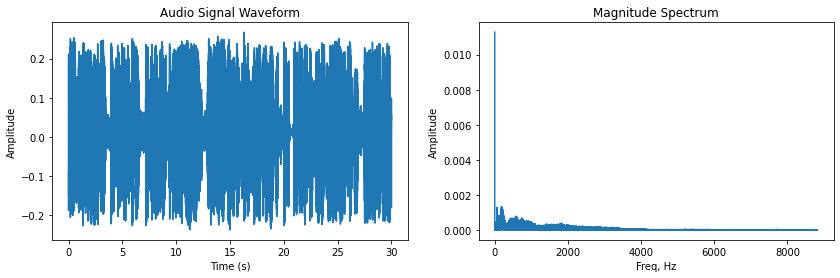


-----speech file 2-----
./music_dataFolder/speech/dialogue1.wav


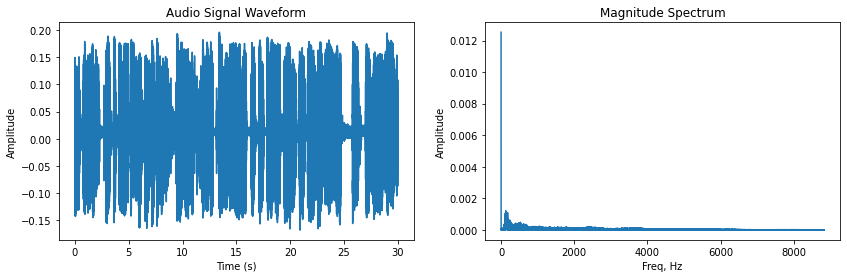

In [2]:
import glob

#load files into dictionary with key value corresponding to genre
mediaDir = './music_dataFolder'
files = {}
files['classical'] = glob.glob(mediaDir + '/classical/'+'*.wav')
files['jazz'] = glob.glob(mediaDir + '/jazz/'+'*.wav')
files['rockblues'] = glob.glob(mediaDir + '/rockblues/'+'*.wav')
files['speech'] = glob.glob(mediaDir + '/speech/'+'*.wav')

Fs = 44100
Ts = 1/Fs 

#print 2 files from each genre
for k, v in files.items():
  
  for i in range(2):
    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load current audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    #get the number of samples in the current audio recording
    n_samples = song.shape[0]

    #get the amplitude domain value for the each sample
    ff = np.arange(0,int(Fs),Fs/n_samples)

    #get the time domain value for each sample
    tt = np.arange(0,n_samples*Ts,Ts)

    #calculate the fast fourier transform for the currect recording
    Sk = np.fft.fft(song)
    ASk = np.abs(Sk) / n_samples

    #plot the audio signal waveform for the current audio file
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.title("Audio Signal Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.plot(tt, song[:len(tt)])

    #plot the spectrum chart for the current audio file
    plt.subplot(1, 2, 2)
    plt.plot(ff[0:int(n_samples/5)], ASk[0:int(n_samples/5)])
    plt.title("Magnitude Spectrum")
    plt.ylabel("Amplitude")
    plt.xlabel("Freq, Hz")  
    plt.show()

On initial inspection, it is apparent that some genres contain more distinguishing traits than others. Based on the two samples extracted from each genre in the dataset, it appears that classical music contains the majority of its frequency content evenly distributed between 0 and 1k Hz. Jazz shares a similar characteristic within a broader ranging from 2kHz to 3kHz. Rockblues demonstrates concentrated frequency components of high magnitude between 0 and 2k Hz. Finally, the speech samples show a more dense spectrum, suggesting the frequency components share similar magnitude and prominent peaks are less frequent.

# **Part 2**

## Feature 1: Mean Spectral Centroid

The magnitude spectrum variation of the spectral centroid is calculated in order to determine the average frequency in which the weighted spectrum resides.
The average of the spectral centroids for each block is determined for each audio file as shown:

$v_{SC,block}(i)=\frac{\sum_{k=0}^{block\_size-1} k|X(i,k)|}{\sum_{k=0}^{block\_size-1} |X(i, k)|}$

<br>

$v_{SC,mean}=\frac{\sum_{i=0}^{n\_blocks-1} v_{SC,block}(i)}{n\_blocks}$

In [3]:
#define dictionary for calculated mean spectral centroid values for each genre
mean_spectral_centroids = {
    'classical': [],
    'jazz': [],
    'rockblues': [],
    'speech': []
}

#loop through dictionary of audio recording genres
for k, v in files.items():

  #loop through each recording for the corresponding genre
  for i in range(len(v)):

    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    #get number of samples for the current audio recording
    n_samples = song.shape[0]

    #define basic parameters for block based analysis of recording
    block_size = 100000 
    overlap = 0.25  #25% overlap between blocks
    block_step = (1-overlap)*block_size  
    n_blocks = np.ceil(n_samples/block_step)

    #initialize zero np array to store spectral centroid for each block
    centroid_list = np.zeros(int(n_blocks))

    #loop through all predefined blocks of audio recording
    for i in range(int(n_blocks)):

      #calculate start and end sample step for current block
      block_s = int(i*block_step)
      block_e = int(min(block_s + block_size, n_samples))

      #calculate audio data for the specific block
      block = song[block_s:block_e]

      #define number of samples for the current block
      Nsamples = block.shape[0]

      ff = np.arange(0,int(Fs),Fs/Nsamples)

      #calculate the fast fourier transform for the current block
      block_fft = np.abs(np.fft.fft(block))

      #only display half of the samples of the audio file for better FFT graph plot
      ff = ff[:int(Nsamples/2)]
      block_fft = block_fft[:int(Nsamples/2)]

      #calculate current block's spectral centroid
      centroid_list[i] = np.sum(ff*block_fft)/np.sum(block_fft)

    #take the mean of all of the audio file's block centroids and round to two decimal places
    mean_centroid_for_file = round(np.mean(centroid_list), 2)

    #print the mean spectral centroid for current file
    print(f'{mean_centroid_for_file} Hz')

    #append the mean spectral centroid to the genre mean spectral centroid dictionary
    mean_spectral_centroids[k].append(mean_centroid_for_file)
#print the dictionary of spectral centroids
print(mean_spectral_centroids)


-----classical file 1-----
./music_dataFolder/classical/classical1.wav
1440.18 Hz

-----classical file 2-----
./music_dataFolder/classical/classical2.wav
1446.49 Hz

-----classical file 3-----
./music_dataFolder/classical/classical.wav
1607.0 Hz

-----classical file 4-----
./music_dataFolder/classical/copland.wav
1872.75 Hz

-----classical file 5-----
./music_dataFolder/classical/copland2.wav
1471.75 Hz

-----classical file 6-----
./music_dataFolder/classical/vlobos.wav
1450.13 Hz

-----classical file 7-----
./music_dataFolder/classical/brahms.wav
1226.17 Hz

-----classical file 8-----
./music_dataFolder/classical/debussy.wav
1528.46 Hz

-----classical file 9-----
./music_dataFolder/classical/bartok.wav
1826.7 Hz

-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav
2404.56 Hz

-----jazz file 2-----
./music_dataFolder/jazz/duke.wav
1473.18 Hz

-----jazz file 3-----
./music_dataFolder/jazz/moanin.wav
1584.5 Hz

-----jazz file 4-----
./music_dataFolder/jazz/russo.wav
1921.62 Hz

--

## Feature 2: Standard deviation of RMS amplitude

The standard deviation of the RMS amplitude of each block is determined in order to analyze the variation of the frequency components around the average frequency magnitude. It is calculated by the following:

$v_{RMS,block}(i)=20log_{10}(\sqrt{\frac{\sum_{k=0}^{block\_size-1} |X(i, k)|^2}{block\_size}})$

<br>

$v_{RMS,SD}=\sqrt{\frac{\sum_{i=0}^{n\_blocks-1} (v_{RMS,block}(i) - v_{RMS,mean})^2}{n\_blocks}}$

In [4]:
#define dictionary for calculated standard deviation of RMS values for each genre
std_rms_amp = {
    'classical': [],
    'jazz': [],
    'rockblues': [],
    'speech': []
}

#loop through dictionary of audio recording genres
for k, v in files.items():
  
  #loop through each recording for the corresponding genre
  for i in range(len(v)):

    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    #get number of samples for the current audio recording
    n_samples = song.shape[0]

    #define basic parameters for block based analysis of recording
    block_size = 100000
    overlap = 0.25 #25% overlap between blocks
    block_step = (1-overlap)*block_size
    n_blocks = np.ceil(n_samples/block_step)

    #initialize zero np array to store RMS amplitude for each block
    rms_amp = np.zeros(int(n_blocks))

    #loop through all predefined blocks of audio recording
    for i in range(int(n_blocks)):

      #calculate start and end sample step for current block
      block_s = int(i*block_step)
      block_e = int(min(block_s + block_size, n_samples))

      #get audio data for the specific block
      block = song[block_s:block_e]

      #define number of samples for the current block
      Nsamples = block.shape[0]

      #calculate RMS amplitude for the current block
      rms = np.sqrt(np.mean(np.square(song[block_s:block_e])))

      #convert RMS amplitude units to decibels
      if rms<0.00001:
        rms = 0.00001
      db_rms = 20*np.log10(rms)

      #add calculated RMS amplitude to list of all block RMS amplitudes
      rms_amp[i] = db_rms
    
    #take the standard diviation of all blocks in the current audio file and round to two decimal places
    std_rms_for_file = round(np.std(rms_amp), 2)

    #print the standard deviation for the RMS ampltude of the audio file among all blocks
    print(f'{std_rms_for_file} dB')

    #append the standard deviation for the RMS ampltude of the audio file to the genre standard diviation RMS amplitude dictionary
    std_rms_amp[k].append(std_rms_for_file)
  
#print the dictionary of standard deviation RMS amplitude values among all files in all genres
print(std_rms_amp)


-----classical file 1-----
./music_dataFolder/classical/classical1.wav
2.81 dB

-----classical file 2-----
./music_dataFolder/classical/classical2.wav
2.19 dB

-----classical file 3-----
./music_dataFolder/classical/classical.wav
4.2 dB

-----classical file 4-----
./music_dataFolder/classical/copland.wav
1.57 dB

-----classical file 5-----
./music_dataFolder/classical/copland2.wav
3.86 dB

-----classical file 6-----
./music_dataFolder/classical/vlobos.wav
2.24 dB

-----classical file 7-----
./music_dataFolder/classical/brahms.wav
3.22 dB

-----classical file 8-----
./music_dataFolder/classical/debussy.wav
5.13 dB

-----classical file 9-----
./music_dataFolder/classical/bartok.wav
2.21 dB

-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav
2.25 dB

-----jazz file 2-----
./music_dataFolder/jazz/duke.wav
1.34 dB

-----jazz file 3-----
./music_dataFolder/jazz/moanin.wav
2.9 dB

-----jazz file 4-----
./music_dataFolder/jazz/russo.wav
1.76 dB

-----jazz file 5-----
./music_dataFolder

## Feature 3: Mean Spectral Rolloff

The mean spectral rolloff is found to determine the bandwidth in which a certain percentage of the frequency spectrum resides. A value of 90% is chosen, and the calculation is implemented as follows:

$v_{SR,block}(i)=m|_{\sum_{k=0}^m|X(i,k)|\text{ = }P\cdot\sum_{k=0}^{block\_size-1}|X(i,k)|}$

<br>

$v_{SR,mean}=\frac{\sum_{i=0}^{n\_blocks-1} v_{SR,block}(i)}{n\_blocks}$

In [5]:
#define dictionary for calculated spectral rolloff values for each genre
spectral_rolloff = {
    'classical': [],
    'jazz': [],
    'rockblues': [],
    'speech': []
}

#define the bandwidth percentage when calculating the spectral rolloff
BANDWIDTH_PERCENTAGE = 0.90

#loop through dictionary of audio recording genres
for k, v in files.items():
  
  #loop through each recording for the corresponding genre
  for i in range(len(v)):

    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    #get number of samples for the current audio recording
    n_samples = song.shape[0]

    #define basic parameters for block based analysis of recording
    block_size = 100000
    overlap = 0.25 #25% overlap between blocks
    block_step = (1-overlap)*block_size
    n_blocks = np.ceil(n_samples/block_step)

    #initialize zero np array to store spectral rolloff for each block
    rolloff_list = np.zeros(int(n_blocks))
    rolloff = []

    #loop through all predefined blocks of audio recording
    for i in range(int(n_blocks)):

      #calculate start and end sample step for current block
      block_s = int(i*block_step)
      block_e = int(min(block_s + block_size, n_samples))

      #calculate audio data for the specific block
      block = song[block_s:block_e]

      #define number of samples for the current block
      Nsamples = block.shape[0]

      ff = np.arange(0,int(Fs),Fs/Nsamples)

      #calculate the fast fourier transform for the current block
      block_fft = np.abs(np.fft.fft(block))

      #only display half of the samples of the audio file for more accurate FFT
      ff = ff[:int(Nsamples/2)]
      block_fft = block_fft[:int(Nsamples/2)]

      #sum over the entire block's spectral range of FFT
      total_sum = np.sum(block_fft)


      #variable to hold the accumulated magnitude of the rolloff calculation
      accumilated_mag = 0
      
      #calculate the spectral rolloff of the block
      for increment, value in enumerate(block_fft):
        accumilated_mag += value
        if accumilated_mag >= BANDWIDTH_PERCENTAGE*total_sum:
          rolloff.append(increment)
          break

    #calculate the scaled percentage for the rolloff calculation
    scaled_percentage = np.average(rolloff) / len(block_fft)

    #calculate the rolloff frequency for the audio file, serving as the mean spectral rolloff
    rolloff_freq = round(scaled_percentage * Fs, 2)

    #print the mean spectral rolloff for the audio file
    print(f'{rolloff_freq} Hz')

    #append the mean spectral rolloff to the dictionary holding the genre spectral rolloffs 
    spectral_rolloff[k].append(rolloff_freq)

#print the dictionary of spectral rolloffs for all genres
print(spectral_rolloff)


-----classical file 1-----
./music_dataFolder/classical/classical1.wav
13766.86 Hz

-----classical file 2-----
./music_dataFolder/classical/classical2.wav
12165.68 Hz

-----classical file 3-----
./music_dataFolder/classical/classical.wav
17048.32 Hz

-----classical file 4-----
./music_dataFolder/classical/copland.wav
14536.87 Hz

-----classical file 5-----
./music_dataFolder/classical/copland2.wav
13685.7 Hz

-----classical file 6-----
./music_dataFolder/classical/vlobos.wav
12723.16 Hz

-----classical file 7-----
./music_dataFolder/classical/brahms.wav
10509.17 Hz

-----classical file 8-----
./music_dataFolder/classical/debussy.wav
13717.35 Hz

-----classical file 9-----
./music_dataFolder/classical/bartok.wav
16452.46 Hz

-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav
22320.42 Hz

-----jazz file 2-----
./music_dataFolder/jazz/duke.wav
13588.82 Hz

-----jazz file 3-----
./music_dataFolder/jazz/moanin.wav
14277.89 Hz

-----jazz file 4-----
./music_dataFolder/jazz/russo.wav


## Feature 4: Mean Spectral Flatness

The specral flatness is defined as the ratio of the signal noisiness to signal tonalness. Higher values of spectral flatness would attribute to a noisier spectrum, while lower values will suggest a more tonal spectrum. The logarithmic magnitude spectrum is used:

$v_{SF,block}(i)=\frac{exp(\sum_{i=0}^{block\_size-1} log(|X(i, k)|))}{\sum_{i=0}^{block\_size-1} |X(i, k)|}$

<br>

$v_{SF,mean}=\frac{\sum_{i=0}^{n\_blocks-1} v_{SF,block}(i)}{n\_blocks}$

In [6]:
#define dictionary for calculated spectral flatness values for each genre
spectral_flatness = {
    'classical': [],
    'jazz': [],
    'rockblues': [],
    'speech': []
}

#loop through dictionary of audio recording genres
for k, v in files.items():
  
  #loop through each recording for the corresponding genre
  for i in range(len(v)):

    #print basic information of audio file
    print()
    print("-----" + k + " file " + str(i+1) + "-----")
    print(v[i])
    
    #load audio recording through essentia
    song = es.MonoLoader(filename=v[i], sampleRate=Fs)()

    #get number of samples for the current audio recording
    n_samples = song.shape[0]

    #define basic parameters for block based analysis of recording
    block_size = 100000
    overlap = 0.25
    block_step = (1-overlap)*block_size
    n_blocks = np.ceil(n_samples/block_step)

    #initialize zero np array to store spectral flatness for each block
    flatness_list = np.zeros(int(n_blocks))
    flatness = []

    #loop through all predefined blocks of audio recording
    for i in range(int(n_blocks)):

      #calculate start and end sample step for current block
      block_s = int(i*block_step)
      block_e = int(min(block_s + block_size, n_samples))

      #calculate audio data for the specific block
      block = song[block_s:block_e]

      #define number of samples for the current block
      Nsamples = block.shape[0]

      ff = np.arange(0,int(Fs),Fs/Nsamples)

      #calculate the fast fourier transform for the current block
      block_fft = np.abs(np.fft.fft(block))

      #only display half of the samples of the audio file to avoid repeating FFT
      ff = ff[:int(Nsamples/2)]
      block_fft = block_fft[:int(Nsamples/2)]

      #calculate log magnitude for the block's FFT
      log_mag = np.log(block_fft)

      #calculate the sum along the entire log magnitude of the FFT
      log_sum = np.sum(log_mag)

      #define exponent section of spectral flatness calculation
      exp = np.exp(1/len(block_fft)*log_sum)

      #calculate the sum along the entire frequency amplitudes of the FFT
      total_sum = np.sum(block_fft)

      #calculate current block's spectral flatness and append to flatness list
      flatness.append(exp / (1/len(block_fft)*total_sum))

    #calculate the mean spectral flatness along all blocks of the audio recording
    mean_flatness = round(np.average(flatness), 6)

    #print the current recording's mean spectral flatness
    print(mean_flatness)

    #append the mean spectral flatness to the genre mean spectral flatness dictionary
    spectral_flatness[k].append(mean_flatness)

#print the dictionary of mean spectral flatness
print(spectral_flatness)


-----classical file 1-----
./music_dataFolder/classical/classical1.wav
0.050081

-----classical file 2-----
./music_dataFolder/classical/classical2.wav
0.067264

-----classical file 3-----
./music_dataFolder/classical/classical.wav
0.070513

-----classical file 4-----
./music_dataFolder/classical/copland.wav
0.053465

-----classical file 5-----
./music_dataFolder/classical/copland2.wav
0.050819

-----classical file 6-----
./music_dataFolder/classical/vlobos.wav
0.043345

-----classical file 7-----
./music_dataFolder/classical/brahms.wav
0.041181

-----classical file 8-----
./music_dataFolder/classical/debussy.wav
0.050647

-----classical file 9-----
./music_dataFolder/classical/bartok.wav
0.046758

-----jazz file 1-----
./music_dataFolder/jazz/ipanema.wav
0.061072

-----jazz file 2-----
./music_dataFolder/jazz/duke.wav
0.044529

-----jazz file 3-----
./music_dataFolder/jazz/moanin.wav
0.05593

-----jazz file 4-----
./music_dataFolder/jazz/russo.wav
0.070319

-----jazz file 5-----
./mu

# **Feature Plots**

Plotting Mean Spectral Centroid vs. Mean Spectral Rolloff

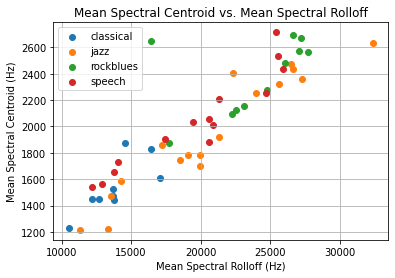

In [7]:
plt.figure()
plt.title('Mean Spectral Centroid vs. Mean Spectral Rolloff')
plt.scatter(spectral_rolloff['classical'], mean_spectral_centroids['classical'], label='classical')
plt.scatter(spectral_rolloff['jazz'], mean_spectral_centroids['jazz'], label='jazz')
plt.scatter(spectral_rolloff['rockblues'], mean_spectral_centroids['rockblues'], label='rockblues')
plt.scatter(spectral_rolloff['speech'], mean_spectral_centroids['speech'], label='speech')
plt.xlabel('Mean Spectral Rolloff (Hz)')
plt.ylabel('Mean Spectral Centroid (Hz)')
plt.legend()
plt.grid()
plt.show()

Plotting Mean Spectral Centroid vs. Mean Spectral Flatness

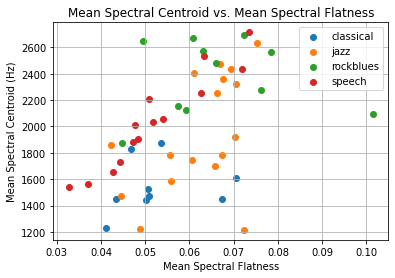

In [8]:
plt.figure()
plt.title('Mean Spectral Centroid vs. Mean Spectral Flatness')
plt.scatter(spectral_flatness['classical'], mean_spectral_centroids['classical'], label='classical')
plt.scatter(spectral_flatness['jazz'], mean_spectral_centroids['jazz'], label='jazz')
plt.scatter(spectral_flatness['rockblues'], mean_spectral_centroids['rockblues'], label='rockblues')
plt.scatter(spectral_flatness['speech'], mean_spectral_centroids['speech'], label='speech')
plt.xlabel('Mean Spectral Flatness')
plt.ylabel('Mean Spectral Centroid (Hz)')
plt.legend()
plt.grid()
plt.show()

Plotting Mean Spectral Centroid vs. Standard Deviation of RMS Amplitude

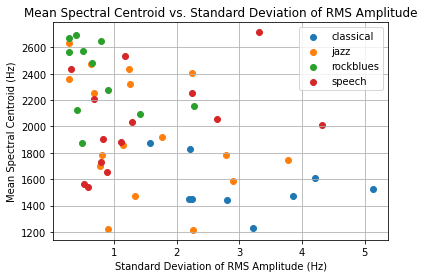

In [9]:
plt.figure()
plt.title('Mean Spectral Centroid vs. Standard Deviation of RMS Amplitude')
plt.scatter(std_rms_amp['classical'], mean_spectral_centroids['classical'], label='classical')
plt.scatter(std_rms_amp['jazz'], mean_spectral_centroids['jazz'], label='jazz')
plt.scatter(std_rms_amp['rockblues'], mean_spectral_centroids['rockblues'], label='rockblues')
plt.scatter(std_rms_amp['speech'], mean_spectral_centroids['speech'], label='speech')
plt.xlabel('Standard Deviation of RMS Amplitude (Hz)')
plt.ylabel('Mean Spectral Centroid (Hz)')
plt.legend()
plt.grid()
plt.show()

Plotting Mean Spectral Rolloff vs. Mean Spectral Flatness

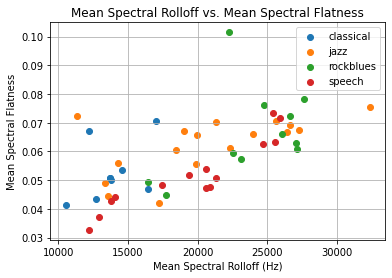

In [10]:
plt.figure()
plt.title('Mean Spectral Rolloff vs. Mean Spectral Flatness')
plt.scatter(spectral_rolloff['classical'], spectral_flatness['classical'], label='classical')
plt.scatter(spectral_rolloff['jazz'], spectral_flatness['jazz'], label='jazz')
plt.scatter(spectral_rolloff['rockblues'], spectral_flatness['rockblues'], label='rockblues')
plt.scatter(spectral_rolloff['speech'], spectral_flatness['speech'], label='speech')
plt.xlabel('Mean Spectral Rolloff (Hz)')
plt.ylabel('Mean Spectral Flatness')
plt.legend()
plt.grid()
plt.show()

Plotting Mean Spectral Rolloff vs. Standard Deviation of RMS Amplitude

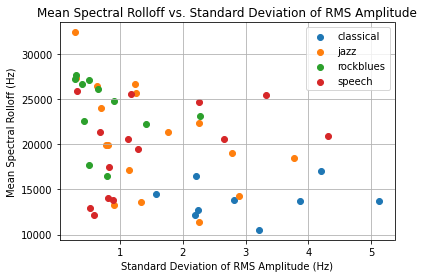

In [11]:
plt.figure()
plt.title('Mean Spectral Rolloff vs. Standard Deviation of RMS Amplitude')
plt.scatter(std_rms_amp['classical'], spectral_rolloff['classical'], label='classical')
plt.scatter(std_rms_amp['jazz'], spectral_rolloff['jazz'], label='jazz')
plt.scatter(std_rms_amp['rockblues'], spectral_rolloff['rockblues'], label='rockblues')
plt.scatter(std_rms_amp['speech'], spectral_rolloff['speech'], label='speech')
plt.ylabel('Mean Spectral Rolloff (Hz)')
plt.xlabel('Standard Deviation of RMS Amplitude (Hz)')
plt.legend()
plt.grid()
plt.show()

Plotting Mean Spectral Flatness vs. Standard Deviation of RMS Amplitude

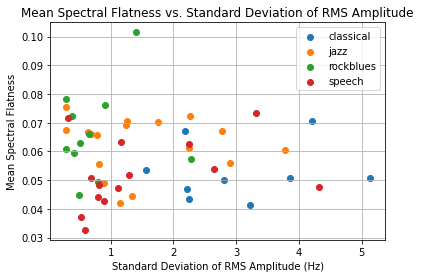

In [12]:
plt.figure()
plt.title('Mean Spectral Flatness vs. Standard Deviation of RMS Amplitude')
plt.scatter(std_rms_amp['classical'], spectral_flatness['classical'], label='classical')
plt.scatter(std_rms_amp['jazz'], spectral_flatness['jazz'], label='jazz')
plt.scatter(std_rms_amp['rockblues'], spectral_flatness['rockblues'], label='rockblues')
plt.scatter(std_rms_amp['speech'], spectral_flatness['speech'], label='speech')
plt.ylabel('Mean Spectral Flatness')
plt.xlabel('Standard Deviation of RMS Amplitude (Hz)')
plt.legend()
plt.grid()
plt.show()

# **Discussion**

The plotted features provide varying levels of separation based on genre. In summary, the rockblues genre provided a decent separation across all features, while jazz was never able to be adequately differentiated. Classical was able to cluster well in the spectral centroid and spectral rolloff features, and speech was only distinguishable in the spectral flatness feature.





<br>


The plotted spectral centroid vs. spectral rolloff plot demonstrates good clustering for the classical and rockblues genres, but also features scattered jazz and speech points. Figure 1 shows the centroid vs. spectral rolloff plot with classical and rockblues points.

<center>

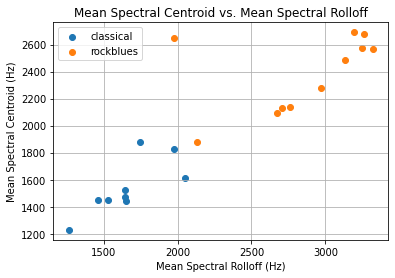

Figure 1. Centroid vs. Rolloff with classical and bluesrock points.</center>

<br>


Spectral flatness, which provides decent clustering for classical, rockblues, and speech, shows scattered data for jazz. When spectral flatness is plotted against spectral centroid or spectral rolloff, it is apparent that classical, rockblues, and speech each provide a somewhat distinguishable grouping. If for example jazz was removed, a KNN implementation may be used for future data classification. Figure 2 shows these two plots without the jazz data points.

<center>

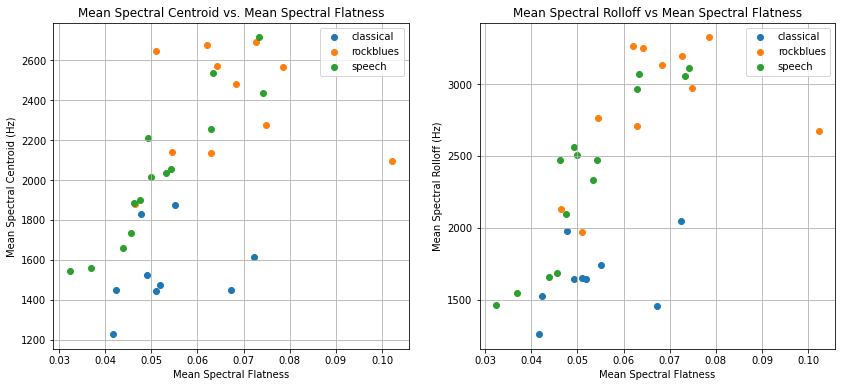

Figure 2. Example feature plots without the jazz data set.</center>